# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [10]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [14]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [17]:
# Create a Beautiful Soup Object
html = browser.html
bs = BeautifulSoup(html, "html.parser")

In [18]:
# Extract all rows of data
all_rows = bs.find('table', class_="table")
print (all_rows)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [20]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
for row in all_rows.find_all('tr', class_= "data-row"):
    columns = row.find_all('td')
    row_data= {
        'id': columns[0].text.strip(),
        'terrestrial_date': columns[1].text.strip(),
        'sol': columns[2].text.strip(), 
        'ls': columns[3].text.strip(),
        'month': columns[4].text.strip(),
        'min_temp': columns[5].text.strip(),
        'pressure': columns[6].text.strip(),
    }
    mars_data.append(row_data)

In [22]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [24]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [27]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [29]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [31]:
# Confirm type changes were successful by examining data types again
print (mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [34]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].nunique()
mars_months

12

In [36]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = mars_df['sol'].nunique()
martian_days

1867

In [38]:
# 3. What is the average minimum temperature by month?
avg_temp = mars_df.groupby('month')['min_temp'].mean()
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

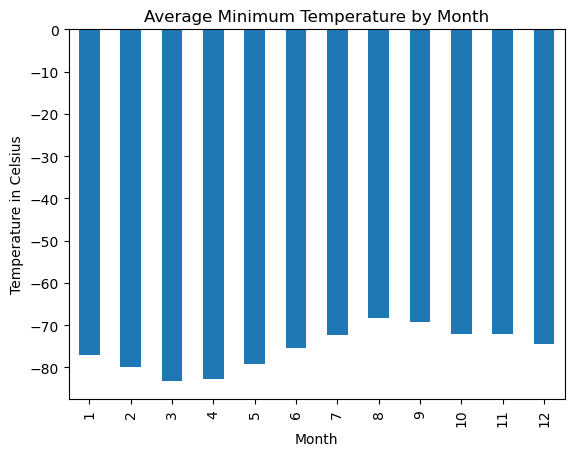

In [40]:
# Plot the average minimum temperature by month
avg_temp.plot(kind='bar', title='Average Minimum Temperature by Month', ylabel='Temperature in Celsius', xlabel='Month')
plt.savefig('avg_temp.png')
plt.show()

Coldest month: 3 (-83.30729166666667°C)
Hottest month: 8 (-68.38297872340425°C)


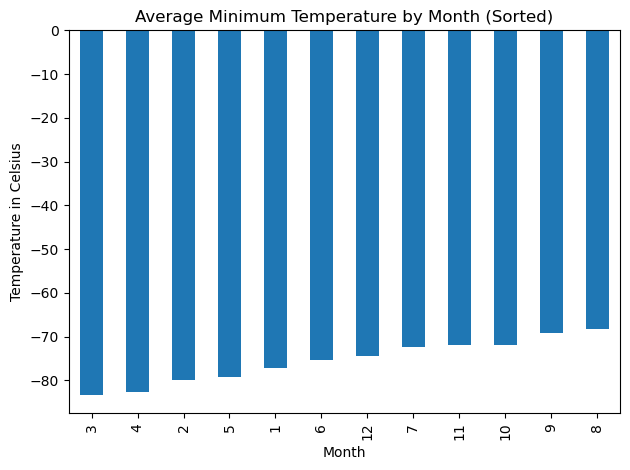

In [48]:
# Sort the average temperature series
sorted_temp = avg_temp.sort_values()

# Identify coldest and hottest months
coldest_month = sorted_temp.idxmin()
coldest_temp = sorted_temp.min()

hottest_month = sorted_temp.idxmax()
hottest_temp = sorted_temp.max()

# Display results
print(f"Coldest month: {coldest_month} ({coldest_temp}°C)")
print(f"Hottest month: {hottest_month} ({hottest_temp}°C)")

sorted_temp.plot(kind='bar', title='Average Minimum Temperature by Month (Sorted)', ylabel='Temperature in Celsius', xlabel='Month')
plt.tight_layout()
plt.savefig('sorted_avg_temp.png')
plt.show()



In [55]:
# 4. What is the average pressure by month?
avg_pressure = mars_df.groupby('month')['pressure'].mean()
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


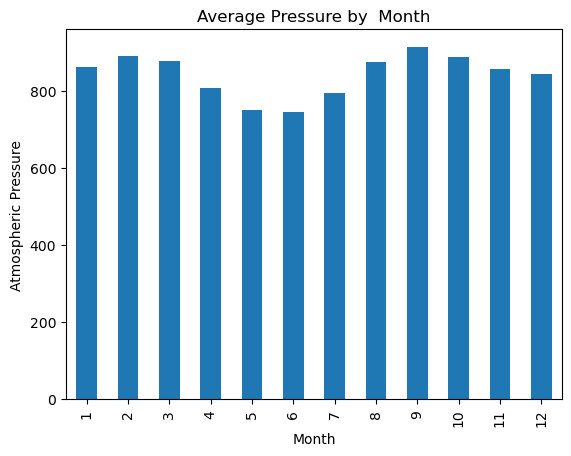

In [62]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', title='Average Pressure by  Month', ylabel='Atmospheric Pressure', xlabel='Month')
plt.savefig('avg_pressure.png')
plt.show()

Lowest pressure month: 6 745.0544217687075
Highest pressure month: 9 913.3059701492538


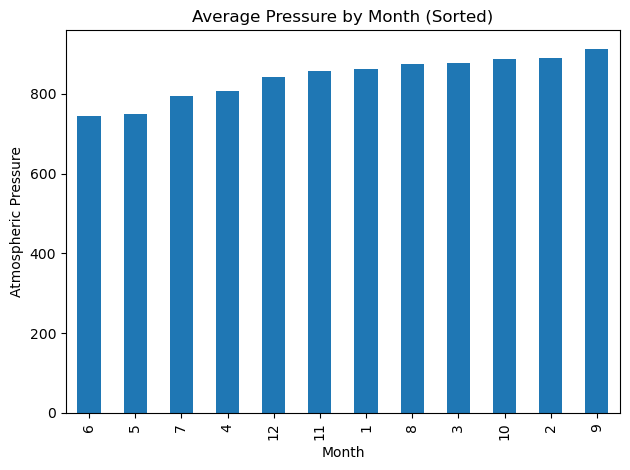

In [64]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average pressure series
sorted_pressure = avg_pressure.sort_values()

# Identify lowest and highest pressure months
lowest_pressure_month = sorted_pressure.idxmin()
lowest_pressure_value = sorted_pressure.min()

highest_pressure_month = sorted_pressure.idxmax()
highest_pressure_value = sorted_pressure.max()

# Display results
print(f"Lowest pressure month: {lowest_pressure_month} {lowest_pressure_value}")
print(f"Highest pressure month: {highest_pressure_month} {highest_pressure_value}")

# Plot sorted pressure values for better visual comparison
sorted_pressure.plot(kind='bar', title='Average Pressure by Month (Sorted)', ylabel='Atmospheric Pressure', xlabel='Month')
plt.tight_layout()
plt.savefig('sorted_avg_pressure.png')
plt.show()


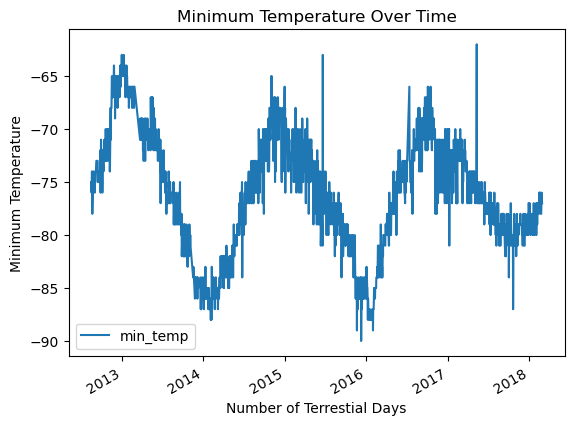

In [68]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df.plot(x='terrestrial_date', y='min_temp', title='Minimum Temperature Over Time', ylabel='Minimum Temperature', xlabel='Number of Terrestial Days')
plt.savefig('mars_df.png')
plt.show()

#### Minimum Temperature

- Month 3 has the coldest average minimum temperature, hitting about -83.31°C. Month 4 isn’t far behind at -82.75°C.
- On the warmer side, Month 8 stands out with the highest average minimum temperature at roughly -68.38°C, followed by Month 9 at -69.17°C.
- There’s a steady warming trend from Month 5 to Month 8, but after that, the temperatures begin to drop again.



#### Atmospheric Pressure

- Month 9 has the highest average atmospheric pressure at 913.31.
- The lowest pressure is recorded in Month 6, with an average of 745.05.
- There’s a steady drop in pressure from Month 2 to Month 6. After that, the pressure starts to climb again from Month 7, reaching its peak in Month 9 before gradually tapering off towards the end of the year.



#### Year Length

- The graph shows peaks and troughs in minimum temperature occurring at regular intervals. By visually estimating the time between two similar points in the cycle (e.g. from one peak to the next peak), it appears that the cycle lasts roughly two Earth years. This aligns with the fact that a Martian year is approximately 687 Earth days, nearly 1.88 Earth years.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [78]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)

In [79]:
browser.quit()